# Multiclass Classification Neural Network

In [1]:
# Importing TF and checking the version
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
from tensorflow.keras.datasets import fashion_mnist

# The data is already split into training and testing subsets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
# Show first training sample
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

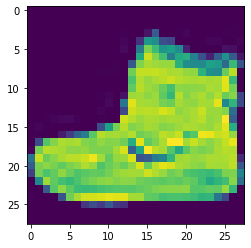

In [4]:
# Plot first training sample
import matplotlib.pyplot as plt

plt.imshow(train_data[0])

In [5]:
# List of actual classes

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"
]
len(class_names)

10

Text(0.5, 1.0, 'Sneaker')

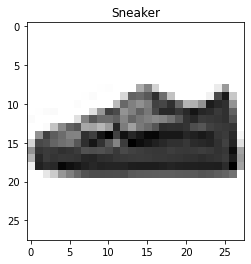

In [6]:
# Plot an example image and its label
index_of_choice = 108
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

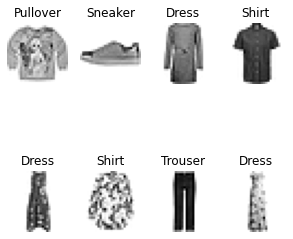

In [7]:
# Random 4 images from the training dataset
import random

plt.figure(figsize=(5, 5))

for i in range(8):
    ax = plt.subplot(2, 4, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Model 1

In [8]:
# Create a model
model_mc1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model - Sparse Categorical Crossentropy
model_mc1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_mc1 = model_mc1.fit(
    train_data,
    train_labels,
    epochs=10,
    validation_data=(test_data, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 2.3060 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3028 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0998 - val_loss: 2.3027 - val_accur

In [9]:
tf.one_hot(train_labels, depth=10)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [10]:
# Create a model
model_mc1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_mc1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_mc1 = model_mc1.fit(
    train_data,
    tf.one_hot(train_labels, depth=10),
    epochs=10,
    validation_data=(test_data, tf.one_hot(test_labels, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.3383 - accuracy: 0.3750 - val_loss: 1.5462 - val_accuracy: 0.4893
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3296 - accuracy: 0.4910 - val_loss: 1.2363 - val_accuracy: 0.4985
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1472 - accuracy: 0.5335 - val_loss: 1.2120 - val_accuracy: 0.5354
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.0782 - accuracy: 0.5612 - val_loss: 1.0470 - val_accuracy: 0.5781
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.0199 - accuracy: 0.5888 - val_loss: 0.9802 - val_accuracy: 0.6116
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9806 - accuracy: 0.6022 - val_loss: 1.0466 - val_accuracy: 0.5549
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.9586 - accuracy: 0.6045 - val_loss: 0.9687 - val_accuracy

In [11]:
# Model summary
model_mc1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Checking min/max values
train_data.min(), train_data.max()

(0, 255)

In [13]:
# Normalise the data in the interval 0 to 1
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [14]:
# Checking normalised min/max values
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [15]:
# Create a model
model_mc2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_mc2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_mc2 = model_mc2.fit(
    train_data_norm,
    train_labels,
    epochs=10,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.3429 - accuracy: 0.5192 - val_loss: 1.0881 - val_accuracy: 0.6233
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8897 - accuracy: 0.7085 - val_loss: 0.7930 - val_accuracy: 0.7360
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7288 - accuracy: 0.7502 - val_loss: 0.7156 - val_accuracy: 0.7554
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6744 - accuracy: 0.7709 - val_loss: 0.6939 - val_accuracy: 0.7653
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6451 - accuracy: 0.7778 - val_loss: 0.6584 - val_accuracy: 0.7780
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6258 - accuracy: 0.7835 - val_loss: 0.6417 - val_accuracy: 0.7815
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6140 - accuracy: 0.7872 - val_loss: 0.6302 - val_accuracy

<AxesSubplot:title={'center':'Normalised data'}>

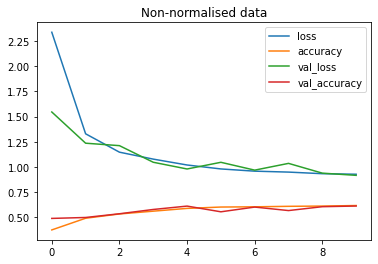

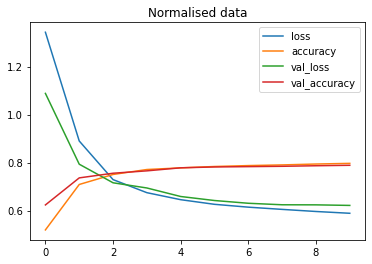

In [16]:
import pandas as pd

# Plot curves
pd.DataFrame(history_mc1.history).plot(title="Non-normalised data")
pd.DataFrame(history_mc2.history).plot(title="Normalised data")

## Finding ideal learning rate

In [17]:
# Create a model
model_mc3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile a model
model_mc3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Create a learning rate call back
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
history_mc3 = model_mc3.fit(
    train_data_norm,
    train_labels,
    epochs=40,
    validation_data=(test_data_norm, test_labels),
    callbacks=[lr_scheduler]
)

Epoch 1/40
1875/1875 [==============================] - 10s 5ms/step - loss: 1.3617 - accuracy: 0.5005 - val_loss: 1.0033 - val_accuracy: 0.6166 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8500 - accuracy: 0.6758 - val_loss: 0.7433 - val_accuracy: 0.7241 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6824 - accuracy: 0.7443 - val_loss: 0.6929 - val_accuracy: 0.7458 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 8s 5ms/step - loss: 0.6268 - accuracy: 0.7700 - val_loss: 0.6410 - val_accuracy: 0.7750 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5863 - accuracy: 0.7968 - val_loss: 0.5963 - val_accuracy: 0.7984 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5593 - accuracy: 0.8077 - val_loss: 0.5797 - val_accuracy: 0.7997 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 8

Text(0.5, 1.0, 'Finding the best learning rate')

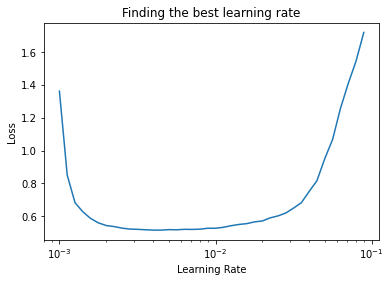

In [18]:
# Plot the learning rate curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, history_mc3.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the best learning rate")

Ideal learning rate seems to be at around 1e-3, i.e. 0.001

In [19]:
# Creating a model with ideal learning rate
model_mc4 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_mc4.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit the model
history_mc4 = model_mc4.fit(
    train_data_norm,
    train_labels,
    epochs=20,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

## Confusion Matrix

In [20]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None,
                        figsize=(10, 10), text_size=15):
    # Create a confusion matrix function
    cm = confusion_matrix(y_true, y_pred)
    cm_normalised = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    print("Normalised confusion matrix:\n", cm_normalised)
    n_classes = cm.shape[0]
    print("Confusion matrix' shape:", cm.shape[0])

    # Let's beautify
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to classes
    if classes:
        labels = classes
    else:
        labels = np.arange(n_classes)

    # Label the axes
    ax.set(
        title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels
    )

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colours
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j, i, f"{cm[i, j]} ({cm_normalised[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color = "white" if cm[i, j] > threshold else "black",
            size=text_size
        )

In [21]:
# Make predictions
y_probs = model_mc4.predict(test_data_norm) # Prediction probabilities
y_probs[:5]

313/313 [==============================] - 1s 1ms/step


array([[0.10021127, 0.09829618, 0.09869125, 0.10076167, 0.1003435 ,
        0.10074662, 0.09857451, 0.09972107, 0.10302501, 0.09962896],
       [0.10021127, 0.09829618, 0.09869125, 0.10076167, 0.1003435 ,
        0.10074662, 0.09857451, 0.09972107, 0.10302501, 0.09962896],
       [0.10021127, 0.09829618, 0.09869125, 0.10076167, 0.1003435 ,
        0.10074662, 0.09857451, 0.09972107, 0.10302501, 0.09962896],
       [0.10021127, 0.09829618, 0.09869125, 0.10076167, 0.1003435 ,
        0.10074662, 0.09857451, 0.09972107, 0.10302501, 0.09962896],
       [0.10021127, 0.09829618, 0.09869125, 0.10076167, 0.1003435 ,
        0.10074662, 0.09857451, 0.09972107, 0.10302501, 0.09962896]],
      dtype=float32)

In [22]:
# Convert preds into integers
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8], dtype=int64)

In [23]:
# Calculation the confusion matrix
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0]],
      dtype=int64)

Normalised confusion matrix:
 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
Confusion matrix' shape: 10


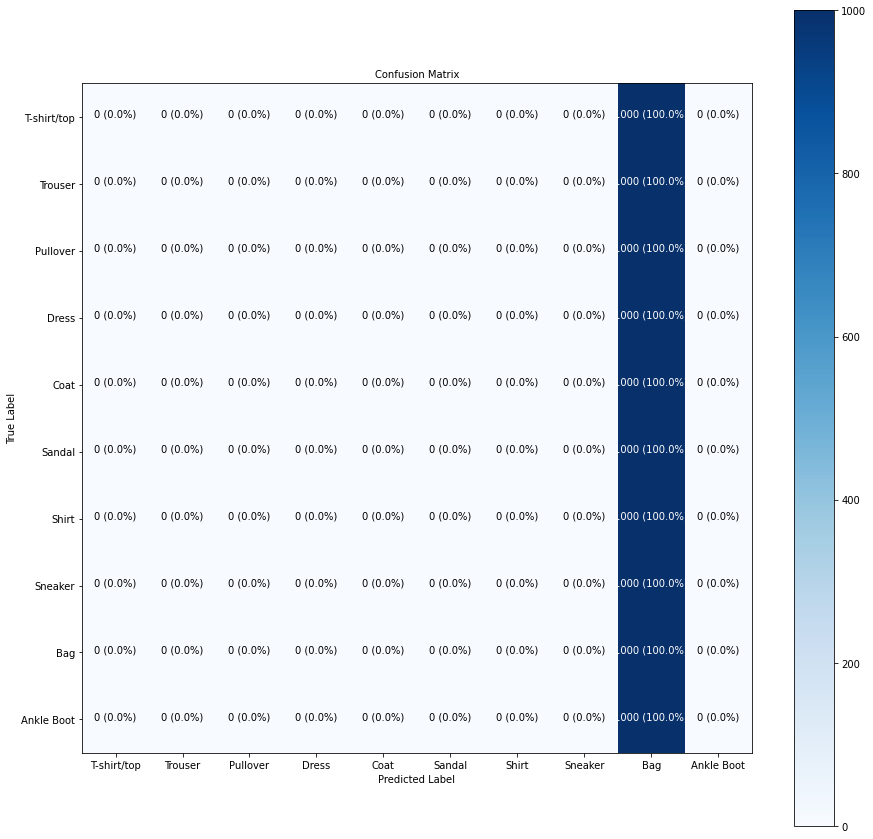

In [24]:
# Beautify with our function
make_confusion_matrix(y_true=test_labels, y_pred=y_preds, classes=class_names, figsize=(15, 15), text_size=10)

## Building a function to select a random image, make prediction and verify it

In [27]:
import random

def plot_random_image(model, images, true_labels, classes):
    """
    This function picks a random image, plots it and labels with its prediction
    """
    
    # Setup a random image
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the colour of the title, depending on whether prediction is right/wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
    
    # Add xlabel information
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(
        pred_label, 100*tf.reduce_max(pred_probs), true_label
    ), color=color)
    

1/1 [==============================] - 0s 33ms/step


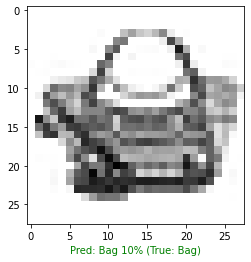

In [37]:
# Check the random image and its prediction
plot_random_image(
    model=model_mc4,
    images=test_data_norm,
    true_labels=test_labels,
    classes=class_names
)